In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
world_rankings = pd.read_csv("/content/fifa_ranking.csv")
world_cup = pd.read_csv("/content/world_cup.csv")
matches = pd.read_csv("/content/matches.csv")

In [3]:
matches.head(2)

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_penalty_shootout_miss_long,away_penalty_shootout_miss_long,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,NaN,"['3|1:1|Kingsley Coman', '5|2:1|Aurélien Tchou...",NaN,NaN,NaN,NaN,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...
1,Croatia,Morocco,2,0.7,NaN,1,1.2,NaN,Zlatko Dalić,Luka Modrić,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['69&rsquor;|2:1|Azzedine Ounahi', '84&rsquor;...",['61&rsquor;|2:1|Nikola Vlašić|for Andrej Kram...,['46&rsquor;|2:1|Ilias Chair|for Abdelhamid Sa...


In [4]:
world_rankings.head(2)

,team,team_code,association,rank,previous_rank,points,previous_points
0,Brazil,BRA,CONMEBOL,1,1,1841.30,1837.56
1,Belgium,BEL,UEFA,2,2,1816.71,1821.92


In [5]:
world_cup.head(2)

,Year,Host,Teams,Champion,Runner-Up,TopScorrer,Attendance,AttendanceAvg,Matches
0,2022,Qatar,32,Argentina,France,Kylian Mbappé - 8,3404252,53191,64
1,2018,Russia,32,France,Croatia,Harry Kane - 6,3031768,47371,64


In [6]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   home_team                        964 non-null    object 
 1   away_team                        964 non-null    object 
 2   home_score                       964 non-null    int64  
 3   home_xg                          128 non-null    float64
 4   home_penalty                     35 non-null     float64
 5   away_score                       964 non-null    int64  
 6   away_xg                          128 non-null    float64
 7   away_penalty                     35 non-null     float64
 8   home_manager                     964 non-null    object 
 9   home_captain                     644 non-null    object 
 10  away_manager                     964 non-null    object 
 11  away_captain                     644 non-null    object 
 12  Attendance            

#📝Dataset Description: FIFA Matches Table
This dataset contains detailed information about football (soccer) matches, including team details, scores, goals, cards, penalties, and match metadata. Each row represents a single match between a home and away team.

Below is a description of the key columns used during the Exploratory Data Analysis (EDA):

###🏟️ Match Information

home_team: Name of the team playing at their home ground.

away_team: Name of the team playing against the home team.

venue: Stadium or location where the match was held.

attendance: Number of spectators present at the match.

date: Date on which the match was played.

round: Stage of the tournament (e.g., Final, Semi-final, Quarter-final, Group stage, etc.).

year: Year in which the match took place.

host: Country that hosted the match or tournament.

###⚽ Scores and Goals
home_score: Number of goals scored by the home team.

away_score: Number of goals scored by the away team.

home_xg: Expected goals (xG) for the home team – a metric that shows the quality of chances created.

away_xg: Expected goals for the away team.

home_penalty: Number of penalty goals scored by the home team.

away_penalty: Number of penalty goals scored by the away team.

score: Final score of the match in string format (e.g., 2-1).

###🎯 Goal Scorers
home_goal: Names of goal scorers from the home team, along with the minute they scored.

away_goal: Names of goal scorers from the away team, with the time of each goal.

home_goal_long / away_goal_long: Possibly more detailed formats of goal-scoring data.

home_own_goal / away_own_goal: Own goals scored accidentally by the team.

home_penalty_goal / away_penalty_goal: Specific goals scored via penalties.

home_penalty_miss_long / away_penalty_miss_long: Penalties missed by the team.

home_penalty_shootout_goal_long / away_penalty_shootout_goal_long: Goals scored in penalty shootouts.

home_penalty_shootout_miss_long / away_penalty_shootout_miss_long: Penalties missed during shootouts.

###🔄 Substitutions
home_substitute_in_long: Players who were substituted into the match for the home team.

away_substitute_in_long: Players substituted into the match for the away team.

In [7]:
print(matches.shape)
print(world_cup.shape)
print(world_rankings.shape)

(964, 44)
(22, 9)
(211, 7)


In [8]:
print(matches.isnull().sum()/len(matches)*100)

home_team                           0.000000
away_team                           0.000000
home_score                          0.000000
home_xg                            86.721992
home_penalty                       96.369295
away_score                          0.000000
away_xg                            86.721992
away_penalty                       96.369295
home_manager                        0.000000
home_captain                       33.195021
away_manager                        0.000000
away_captain                       33.195021
Attendance                          0.000000
Venue                               0.000000
Officials                          26.452282
Round                               0.000000
Date                                0.000000
Score                               0.000000
Referee                            26.452282
Notes                              92.427386
Host                                0.000000
Year                                0.000000
home_goal 

In [9]:
world_rankings.isnull().sum()

,0
team,0
team_code,0
association,0
rank,0
previous_rank,0
points,0
previous_points,0


In [10]:
world_cup.isnull().sum()

,0
Year,0
Host,0
Teams,0
Champion,0
Runner-Up,0
TopScorrer,0
Attendance,0
AttendanceAvg,0
Matches,0


In [11]:
print(world_rankings.duplicated().sum())
print(world_cup.duplicated().sum())
print(matches.duplicated().sum())

0
0
0


- The three tables has no duplicates.
- Matches table has null values in some columns though they can be neglected because most of the columns are irreleveant.
- world_rankings and world_cup dataset has no null values in any of the columns.

In [12]:
matches["home_team"].unique()

array(['Argentina', 'Croatia', 'France', 'Morocco', 'England',
       'Netherlands', 'Portugal', 'Japan', 'Brazil', 'Korea Republic',
       'Ghana', 'Cameroon', 'Serbia', 'Canada', 'Costa Rica', 'Australia',
       'Tunisia', 'Saudi Arabia', 'Poland', 'Ecuador', 'IR Iran', 'Wales',
       'Belgium', 'Spain', 'Qatar', 'Switzerland', 'Uruguay', 'Germany',
       'Denmark', 'Mexico', 'Senegal', 'United States', 'Sweden',
       'Russia', 'Colombia', 'Panama', 'Iceland', 'Nigeria', 'Peru',
       'Egypt', 'Algeria', 'Bosnia and Herzegovina', 'Honduras', 'Italy',
       'Greece', "Côte d'Ivoire", 'Chile', 'Paraguay', 'Korea DPR',
       'Slovakia', 'Slovenia', 'South Africa', 'New Zealand', 'Ukraine',
       'Togo', 'Czech Republic', 'Serbia and Montenegro', 'Angola',
       'Trinidad and Tobago', 'Türkiye', 'China PR',
       'Republic of Ireland', 'Romania', 'Scotland', 'FR Yugoslavia',
       'Jamaica', 'Bulgaria', 'Bolivia', 'Norway', 'West Germany',
       'Yugoslavia', 'Czechoslovaki

####There are a total of 82 teams.

In [13]:
matches["home_team"] = matches["home_team"].apply(lambda x: x.replace("Germany DR", "West Germany"))
matches["away_team"] = matches["away_team"].apply(lambda x: x.replace("Germany DR", "West Germany"))

After World War II, Germany was split into two countries:

**West Germany**

- Official name: Federal Republic of Germany It was democratic and aligned with Western countries (like the US, UK, etc.)

- In FIFA tournaments, this team played as "West Germany"

**East Germany**

- Official name: German Democratic Republic (GDR) or Deutschland DR It was a communist state under Soviet influence

- In sports and FIFA records, it's often listed as "Germany DR" or "East Germany"

Germany DR → This is East Germany (GDR, communist side)(1949 - 1990)

West Germany → This is West Germany (Federal Republic, democratic side)(1949 - 1990)

Germany → This is Unified Germany (after 1990 reunification)

*So i made "Germany Dr" as "West Germany"*

#EDA

In [14]:
# Total Matches Played till 2022
print(f"Total Number of matches = {len(matches)}")
# Total Goals Scored (Excluding Penalty Goals)
print(f"Total Goals scored = { sum(matches['home_score'] + matches['away_score']) }")
# Average goals scored per match
print(f"Total Goals scored = { sum(matches['home_score'] + matches['away_score']) / len(matches) }")
# Total attendance over time
print(f"Total attendance = {sum(matches['Attendance'])}")
# Average attendance over time
print(f"Average attendance = {sum(matches['Attendance']) / len(matches)}")

Total Number of matches = 964
Total Goals scored = 2720
Total Goals scored = 2.8215767634854774
Total attendance = 44048413
Average attendance = 45693.3744813278


In [15]:
# Times a particular country won fifa
winners = world_cup["Champion"].value_counts().reset_index()
winners

,Champion,count
0,Brazil,5
1,Italy,4
2,Argentina,3
3,Germany,2
4,France,2
5,Uruguay,2
6,West Germany,2
7,Spain,1
8,England,1


In [16]:
fig = px.pie(winners, names='Champion' , values='count', title='Number of times a country won FIFA')
# Update
fig.update_traces(textinfo='label+value')
fig.show()

In [17]:
# First Runner-Up, Second Runner-up

In [18]:
matches['Round'].unique()

array(['Final', 'Third-place match', 'Semi-finals', 'Quarter-finals',
       'Round of 16', 'Group stage', 'Second group stage',
       'First group stage', 'Second round', 'First round',
       'Group stage play-off', 'Final stage'], dtype=object)

- Here two columns are important to find runner up and second runner up
- The one who loses the final is the runner up and the one who wins the "Third-place match" is the second runner-up



In [19]:
# Filling the nan values in "home_penalty" and "away_penalty" columns by 0
matches['home_penalty'].fillna(0, inplace=True)
matches['away_penalty'].fillna(0, inplace=True)

In [20]:
# home_team and away_team might have same home_score so adding goals of their penalty shootouts
matches['h_total'] = matches['home_score'] + matches['home_penalty']
matches['a_total'] = matches['away_score'] + matches['away_penalty']

In [21]:
Runner = matches[matches['Round']=='Final']
Third = matches[matches['Round']=='Third-place match']

In [22]:
# Creating two functions to get runner up and third runner up and applying it on Runner and Third dataframe
def getRunner(row):
  if(row['h_total'] > row['a_total']):
    return row['away_team']
  else:
    return row['home_team']

def getThird(row):
  if(row['h_total'] > row['a_total']):
    return row['home_team']
  else:
    return row['away_team']

Runner['Runner_up'] = Runner.apply(getRunner, axis=1)
Third['Third_place'] = Third.apply(getThird, axis=1)

In [23]:
Runner['Runner_up'].value_counts().reset_index()

,Runner_up,count
0,Argentina,3
1,West Germany,3
2,Netherlands,3
3,Hungary,2
4,France,2
5,Czechoslovakia,2
6,Italy,2
7,Croatia,1
8,Germany,1
9,Brazil,1


In [24]:
trace1 = go.Bar(
    x=Runner['Runner_up'].value_counts().index,
    y=Runner['Runner_up'].value_counts().values,
    name='First Runner Up'
)
trace2 = go.Bar(
    x=Third['Third_place'].value_counts().index,
    y=Third['Third_place'].value_counts().values,
    name='Second Runner Up'
)

In [25]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("First Runner Up", "Second Runner Up"))

#Adding traces
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=2)

##Conclusions :-
- Brazil won the most number of fifa word cups followed by Italy, Argentina
- Argentina, West Germany, Netherlands were the runner-ups for most number of times
- Germany was second runner up for most number of times

In [26]:
# Find in how many years or in which years a particular team participated

data = matches.groupby('Year').agg(home=('home_team', list), away=('away_team', list))
data['teams'] = data.apply(lambda x: list(set(x['home'] + x['away'])), axis=1)
data['n_teams'] =  data['teams'].apply(len)

In [27]:
data.head()

,home,away,teams,n_teams
Year,,,,
1930,"[Uruguay, Uruguay, Argentina, Argentina, Urugu...","[Argentina, Yugoslavia, United States, Chile, ...","[Mexico, Paraguay, Brazil, Argentina, Romania,...",13
1934,"[Italy, Germany, Czechoslovakia, Italy, Italy,...","[Czechoslovakia, Austria, Germany, Austria, Sp...","[France, Austria, Spain, Sweden, Brazil, Roman...",16
1938,"[Brazil, Italy, Hungary, Italy, Brazil, Sweden...","[Sweden, Hungary, Sweden, Brazil, Czechoslovak...","[France, Dutch East Indies, Cuba, Belgium, Swe...",15
1950,"[Sweden, Uruguay, Brazil, Uruguay, Brazil, Uru...","[Spain, Brazil, Spain, Sweden, Sweden, Spain, ...","[Spain, Mexico, Paraguay, Sweden, Brazil, Urug...",13
1954,"[Germany, Austria, Hungary, Germany, Germany, ...","[Hungary, Uruguay, Uruguay, Austria, Yugoslavi...","[France, Austria, Mexico, Scotland, Brazil, Ko...",16


In [28]:
data_pivot = data['teams'].explode().reset_index().pivot(index='Year', columns='teams', values='Year').T
data_pivot

Year,1930,1934,1938,1950,1954,1958,1962,1966,1970,1974,...,1986,1990,1994,1998,2002,2006,2010,2014,2018,2022
teams,,,,,,,,,,,,,,,,,,,,,
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1986.0,NaN,NaN,NaN,NaN,NaN,2010.0,2014.0,NaN,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2006.0,NaN,NaN,NaN,NaN
Argentina,1930.0,1934.0,NaN,NaN,NaN,1958.0,1962.0,1966.0,NaN,1974.0,...,1986.0,1990.0,1994.0,1998.0,2002.0,2006.0,2010.0,2014.0,2018.0,2022.0
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1974.0,...,NaN,NaN,NaN,NaN,NaN,2006.0,2010.0,2014.0,2018.0,2022.0
Austria,NaN,1934.0,NaN,NaN,1954.0,1958.0,NaN,NaN,NaN,NaN,...,NaN,1990.0,NaN,1998.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,1930.0,NaN,NaN,1950.0,1954.0,NaN,1962.0,1966.0,1970.0,1974.0,...,1986.0,1990.0,NaN,NaN,2002.0,NaN,2010.0,2014.0,2018.0,2022.0
Wales,NaN,NaN,NaN,NaN,NaN,1958.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0
West Germany,NaN,NaN,NaN,NaN,NaN,1958.0,1962.0,1966.0,1970.0,1974.0,...,1986.0,1990.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
data_pivot.fillna(0, inplace=True)
data_pivot = data_pivot.applymap(lambda x : 1 if x>0 else 0)

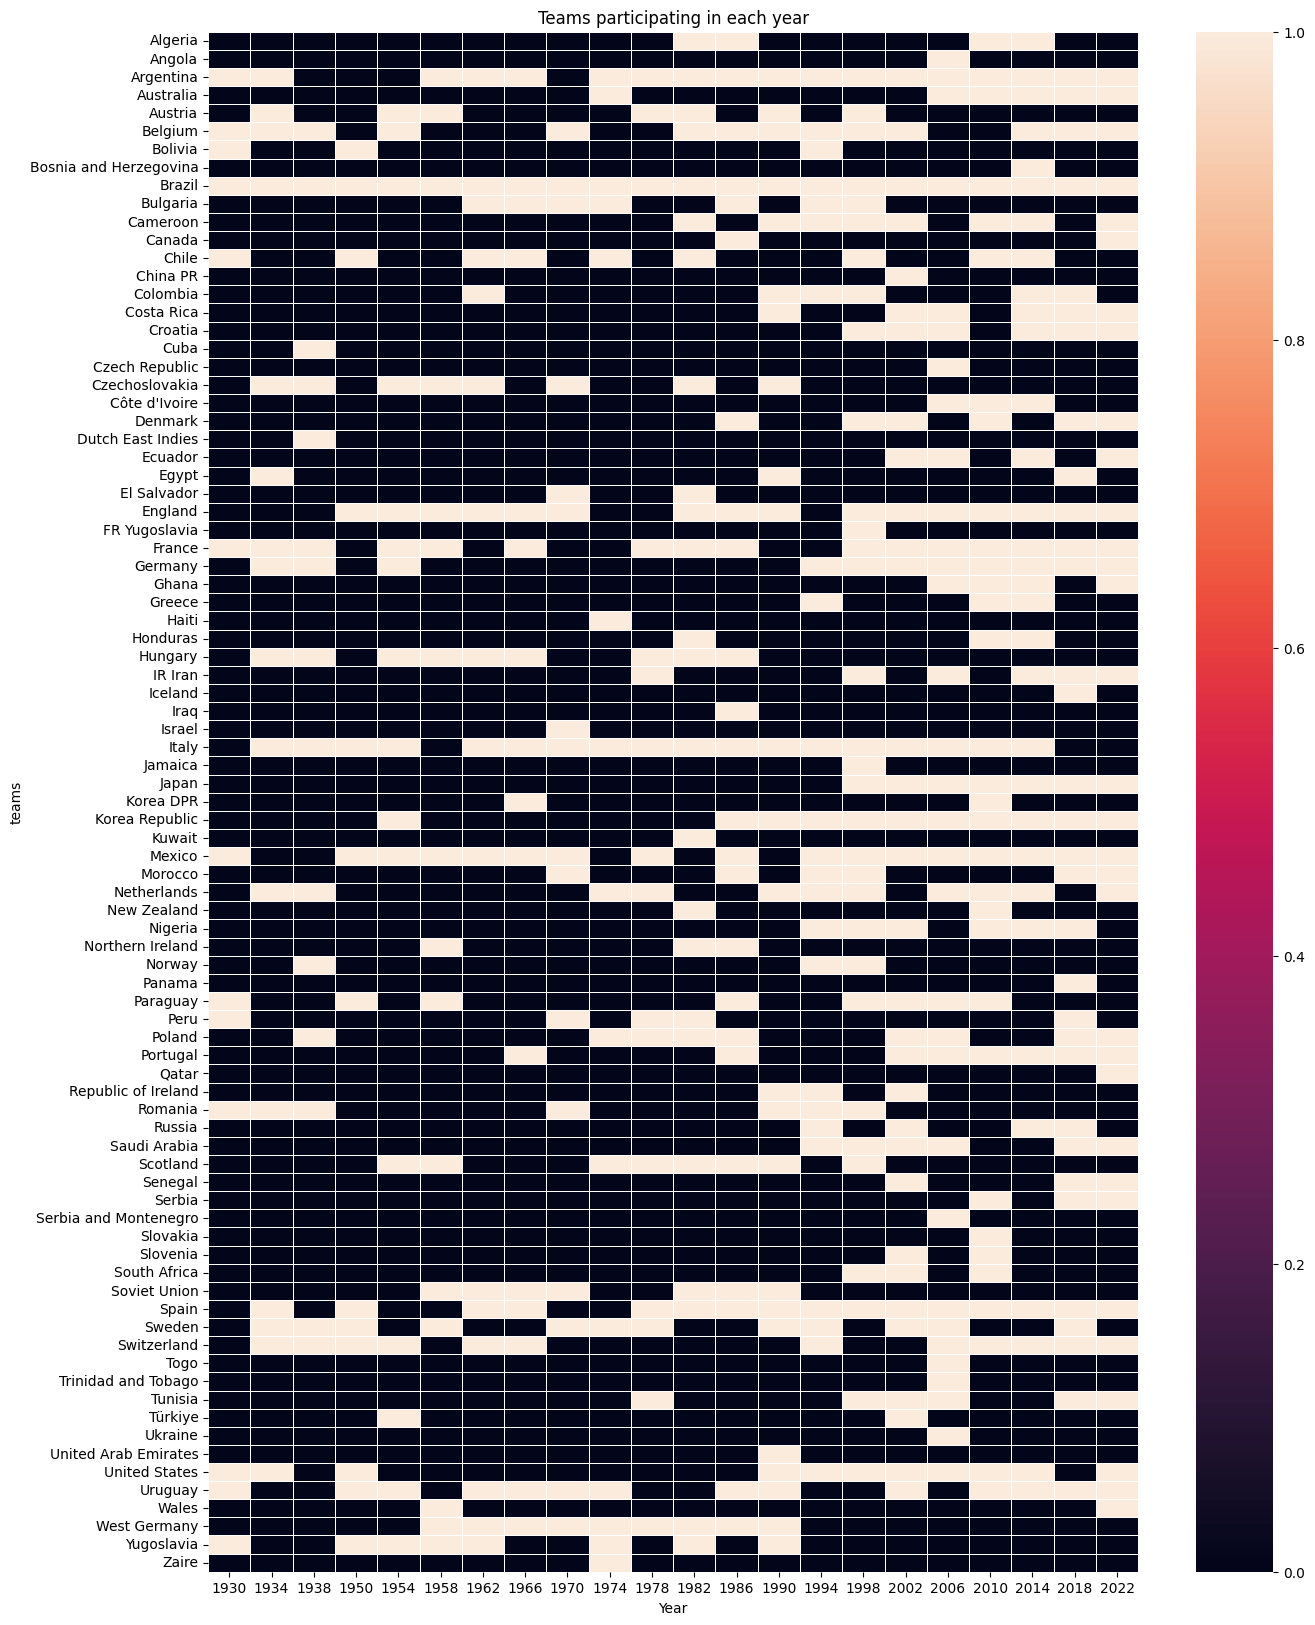

In [30]:
plt.figure(figsize=(15,20))
sns.heatmap(data_pivot, linewidth=0.5)
plt.title('Teams participating in each year')
plt.show()

###📌 General Observations:

- Regular participants:
Some countries have consistently participated across many years — e.g.,

- Brazil, Germany, Argentina, France, and Italy show frequent participation.

- These are typically high-performing, historically strong footballing nations.

- Rare participants:
Countries like China PR, Trinidad and Tobago, Cuba, Zaire, and Indonesia (Dutch East Indies) have only a single or very few appearances, indicating rare qualifications.

- Not all strong teams always qualified:
Even top nations have missed a few tournaments:

 - France missed 1994.

 - Italy missed 2018.

 - Netherlands missed 2002 and 2018.

- Teams like Qatar, Bosnia and Herzegovina, and Iceland appear only in recent years, reflecting changes in qualification and global reach of football.

In [31]:
# Which team rank decreased, increased or remained same

In [32]:
Same_rank = world_rankings[world_rankings['rank'] == world_rankings['previous_rank']]['team'].tolist()
Rank_decreased = world_rankings[world_rankings['rank'] > world_rankings['previous_rank']]['team'].tolist()
Rank_increased = world_rankings[world_rankings['rank'] < world_rankings['previous_rank']]['team'].tolist()

In [33]:
print(len(Same_rank))
print(len(Rank_decreased))
print(len(Rank_increased))

66
68
77


In [34]:
# As they have different lengths to convert them into single df adding none rows to same_rank and Rank_decreased
max_length = max(len(Same_rank), len(Rank_decreased), len(Rank_increased))

Same_rank += [None]*(max_length - len(Same_rank))
Rank_decreased += [None]*(max_length - len(Rank_decreased))

In [35]:
df = pd.DataFrame({
    'Same_rank': Same_rank,
    'Rank_decreased': Rank_decreased,
    'Rank_increased': Rank_increased
})

In [36]:
df

,Same_rank,Rank_decreased,Rank_increased
0,Brazil,Spain,Italy
1,Belgium,Mexico,Croatia
2,Argentina,Uruguay,Switzerland
3,France,USA,IR Iran
4,England,Peru,Serbia
...,...,...,...
72,None,None,Timor-Leste
73,None,None,Eritrea
74,None,None,Aruba
75,None,None,Bahamas


In [37]:
# Function to find whether a particular country's rank increased, decreased, or not changed
def find_Rank(Country):
  for column in df.columns:
    matches = df[column] == Country
    if matches.any():
      print(column)

find_Rank('Spain')

Rank_decreased


# Advance EDA

In [38]:
Country = 'Argentina'

In [39]:
# Calculating performance of countries
data = matches[(((matches['home_team']==Country) | (matches['away_team']==Country)) &
      ((matches['Round']=='Final') | (matches['Round']=='Semi-finals') | (matches['Round']=='Quarter-finals')))]

# Filtering the matches based on finals, semi-finals and quarter-finals and also for a specific country

In [40]:
df1 = data['Round'].value_counts().reset_index()
df1.columns = ['Round', 'Total Matches'] # changing the name of the columns
df1

,Round,Total Matches
0,Quarter-finals,8
1,Final,6
2,Semi-finals,5


In [41]:
# Function to get winner
def getWinner(row):
  if(row['h_total'] > row['a_total']):
    return row['home_team']
  else:
    return row['away_team']

In [42]:
data['Winner'] = data.apply(getWinner, axis=1)

In [43]:
# Calculating number of semi-finals, Quater-finals and Finals won by a specific country
df2 = data[data['Winner'] == Country]['Round'].value_counts().reset_index()
df2.columns = ['Round', 'Total Wins']
df2

,Round,Total Wins
0,Semi-finals,5
1,Quarter-finals,4
2,Final,3


In [44]:
# This function will calculate all the above task and give a performance dataset
def calculate_performance(country):
  # Filtering data based on the country and return its final, semi-finals and quarter final matches
  data = matches[(((matches['home_team']==country) | (matches['away_team']==country)) &
      ((matches['Round']=='Final') | (matches['Round']=='Semi-finals') | (matches['Round']=='Quarter-finals')))]

  # Calculating the counts of matches played by them in each round
  df1 = pd.DataFrame(data['Round'].value_counts().reset_index())
  df1.columns = ['Round', 'Total Matches']

  # Function to get winner of each matches filtered by that country
  def getWinner(row):
    if(row['h_total'] > row['a_total']):
      return row['home_team']
    else:
      return row['away_team']

  data['Winner'] = data.apply(getWinner, axis=1)

  df2 = data[data['Winner'] == country]['Round'].value_counts().reset_index()
  df2.columns = ['Round', 'Total Wins']

  # Creating new data frame by mergind df1 and df2
  result = pd.merge(df1, df2, on='Round', how='inner')

  # Calulating win percentage of each round
  result['Win Percentage'] = (result['Total Wins'] / result['Total Matches']) * 100

  return result

In [45]:
calculate_performance('Argentina') # Performance data for Argentina

,Round,Total Matches,Total Wins,Win Percentage
0,Quarter-finals,8,4,50.0
1,Final,6,3,50.0
2,Semi-finals,5,5,100.0


In [46]:
calculate_performance('Spain') # Performance data for Spain

,Round,Total Matches,Total Wins,Win Percentage
0,Quarter-finals,6,2,33.333333
1,Final,1,1,100.000000
2,Semi-finals,1,1,100.000000


In [47]:
calculate_performance('Italy') # Performance data for Italy

,Round,Total Matches,Total Wins,Win Percentage
0,Quarter-finals,8,6,75.000000
1,Semi-finals,7,6,85.714286
2,Final,6,4,66.666667


#### Playing Strategy of teams in Knockout('final', 'semi-finals', 'quarter-finals') matches vs Non-knockout matches

In [48]:
import re

pattern = r"· (\d+)" # This pattern is to extract time at which the goals scored

# Checking with an example row whether the pattern is working or not
n1 = re.findall(pattern, str(matches['home_goal'][0]))
n1

['36', '108']

In [49]:
# Creating Function for home team
def extract_time(row):
  if pd.notna(row['home_goal']):
    goal_str = str(row['home_goal'])
    time = []
    matches = re.findall(pattern, goal_str)
    time.extend(matches)
    return ', '.join(time)
  else:
    return ''

# This function will extract time from every row from the matches for the home team
matches['Home_goals'] = matches.apply(extract_time, axis=1)
matches['Home_goals'][0]

'36, 108'

In [50]:
# Creating Function for away team
def extract_time(row):
  if pd.notna(row['away_goal']):
    goal_str = str(row['away_goal'])
    time = []
    matches = re.findall(pattern, goal_str)
    time.extend(matches)
    return ', '.join(time)
  else:
    return ''

matches['Away_goals'] = matches.apply(extract_time, axis=1)
matches['Away_goals'][0]

'81'

In [51]:
# Rounds as Knockout or Not

Knockout = ['Final', 'Semi-finals', 'Quarter-finals']

# Filtering the rounds as knockout and as Non-Knockout
matches['Knockout'] = matches['Round'].apply(lambda x : 'Knockout' if x in Knockout else 'Non-Knockout')

In [52]:
home_k = matches[(matches['home_team']==Country) & (matches['Knockout'] == 'Knockout')]
away_k = matches[(matches['away_team']==Country) & (matches['Knockout'] == 'Knockout')]

home_nk = matches[(matches['home_team']==Country) & (matches['Knockout'] == 'Non-Knockout')]
away_nk = matches[(matches['away_team']==Country) & (matches['Knockout'] == 'Non-Knockout')]

In [53]:
# For Knockout
a = home_k['Home_goals'].str.split(', ').explode().reset_index()
b = away_k['Away_goals'].str.split(', ').explode().reset_index()

df1 = pd.concat([a,b], axis=0, ignore_index=True)
df1.replace('', 0, inplace=True)
df1.fillna(0, inplace=True)

df1['Home_goals'] = df1['Home_goals'].astype(int)
df1['Away_goals'] = df1['Away_goals'].astype(int)

df1['time'] = df1['Home_goals'] + df1['Away_goals']

df1 = df1[df1['time']!=0]

def determine(row):
  if(row['time'] <= 45):
    return 'First Half'
  elif(row['time'] > 45 and row['time'] <= 90):
    return 'Second Half'
  else:
    return 'Extra Time'

df1['time'] = df1.apply(determine, axis=1)

print(df1['time'].value_counts())
df1['time'].value_counts()/len(df1)*100

time
Second Half    14
First Half     10
Extra Time      3
Name: count, dtype: int64


,count
time,
Second Half,51.851852
First Half,37.037037
Extra Time,11.111111


In [54]:
# For Non-Knockout
c = home_nk['Home_goals'].str.split(', ').explode().reset_index()
d = away_nk['Away_goals'].str.split(', ').explode().reset_index()

df2 = pd.concat([c,d], axis=0, ignore_index=True)
df2.replace('', 0, inplace=True)
df2.fillna(0, inplace=True)

df2['Home_goals'] = df2['Home_goals'].astype(int)
df2['Away_goals'] = df2['Away_goals'].astype(int)

df2['time'] = df2['Home_goals'] + df2['Away_goals']

df2 = df2[df2['time']!=0]

def determine(row):
  if(row['time'] <= 45):
    return 'First Half'
  elif(row['time'] > 45 and row['time'] <= 90):
    return 'Second Half'
  else:
    return 'Extra Time'

df2['time'] = df2.apply(determine, axis=1)

print(df2['time'].value_counts())
(df2['time'].value_counts()/len(df2)*100).reset_index()

time
Second Half    60
First Half     49
Extra Time      1
Name: count, dtype: int64


,time,count
0,Second Half,54.545455
1,First Half,44.545455
2,Extra Time,0.909091


## Conclusion :-   
- Generally teams play more aggressive in second-half then first-half be it knockout or non-knockout tournaments.

- In Knockout tournaments, Mexico only scored in the First half, they might have the strategy of defending in second half and maintaining the lead.

- In knockout tournaments countries Romania, Pero play with the same aggression in both the halves

- Spain have very different strategy they play with almost same aggression in both the halves in non-knockout matches but they play with different strategy in Knockout matches, on first half they are into passive state(not scoring much) and they play more violently in second half infact the goals scored by them in the second-half is almost equal to the goal scored in the extra time

#### Does Substitution turns out to be good for the team?

In [55]:
# Does Substitution turns out to be good for the team

matches_df = pd.read_csv("/content/matches.csv")
matches_df.head(3)

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_penalty_shootout_miss_long,away_penalty_shootout_miss_long,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,NaN,"['3|1:1|Kingsley Coman', '5|2:1|Aurélien Tchou...",NaN,NaN,NaN,NaN,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...
1,Croatia,Morocco,2,0.7,NaN,1,1.2,NaN,Zlatko Dalić,Luka Modrić,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['69&rsquor;|2:1|Azzedine Ounahi', '84&rsquor;...",['61&rsquor;|2:1|Nikola Vlašić|for Andrej Kram...,['46&rsquor;|2:1|Ilias Chair|for Abdelhamid Sa...
2,France,Morocco,2,2.0,NaN,0,0.9,NaN,Didier Deschamps,Hugo Lloris,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['27&rsquor;|1:0|Sofiane Boufal'],['65&rsquor;|1:0|Marcus Thuram|for Olivier Gir...,['21&rsquor;|1:0|Selim Amallah|for Romain Saïs...


In [56]:
# Creating parse substituion function
def parse_substitution_data(subs):
  if pd.isna(subs):
    return []
  pattern =  r"(\d+)&rsquor;\|(.+?)\|for (.+?)(?=\||$)"
  matches = re.findall(pattern, subs)
  return [{'minute':int(match[0]), 'player_in':match[1], 'player_out':match[2]} for match in matches]

matches_df['home_substitute_in_long'].apply(parse_substitution_data)[0]

[{'minute': 64,
  'player_in': '2:0|Marcos Acuña',
  'player_out': "Ángel Di María', '91&rsquor;"},
 {'minute': 102,
  'player_in': '2:2|Leandro Paredes',
  'player_out': "Rodrigo De Paul', '103&rsquor;"},
 {'minute': 116,
  'player_in': '3:2|Germán Pezzella',
  'player_out': "Alexis Mac Allister', '120+1&rsquor;"}]

In [57]:
matches_df['home_substitutions'] = matches_df['home_substitute_in_long'].apply(parse_substitution_data)
matches_df['away_substitutions'] = matches_df['away_substitute_in_long'].apply(parse_substitution_data)

In [58]:
# Parsing Goal Data
# From home_goal and away_goal column this function extracts the scorer of the goal and on which minute it was scored
def parse_goal_data(goals):
  if pd.isna(goals):
    return []

  goals_parsed = goals.split('|')
  parsed = []
  for goal in goals_parsed:
    parts = goal.split('·')
    if len(parts) == 2:
      try:
        minute = int(parts[1].strip())
        scorer = parts[0].strip()
        parsed.append({'minute': minute, 'scorer': scorer})
      except ValueError:
        pass
  return parsed

In [59]:
matches_df['home_goal'].apply(parse_goal_data)[0]

[{'minute': 36, 'scorer': 'Ángel Di María'},
 {'minute': 108, 'scorer': 'Lionel Messi'}]

In [60]:
matches_df['home_goal_details'] = matches_df['home_goal'].apply(parse_goal_data)
matches_df['away_goal_details'] = matches_df['away_goal'].apply(parse_goal_data)

In [61]:
# Filter matches on the basis of the particular team
def filter_matches(df, team_name):
  return df[(df['home_team'] == team_name) | (df['away_team'] == team_name)]

team_name = 'Germany'
team_matches_df = filter_matches(matches_df, team_name)

team_matches_df.head()

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long,home_substitutions,away_substitutions,home_goal_details,away_goal_details
22,Costa Rica,Germany,2,1.3,NaN,4,5.7,NaN,Luis Fernando Suárez,Keylor Navas,...,NaN,NaN,['77&rsquor;|2:2|Óscar Duarte'],NaN,['46&rsquor;|0:1|Youstin Salas|for Brandon Agu...,['46&rsquor;|0:1|Lukas Klostermann|for Leon Go...,"[{'minute': 46, 'player_in': '0:1|Youstin Sala...","[{'minute': 46, 'player_in': '0:1|Lukas Kloste...","[{'minute': 58, 'scorer': 'Yeltsin Tejeda'}]","[{'minute': 10, 'scorer': 'Serge Gnabry'}, {'m..."
39,Spain,Germany,1,0.6,NaN,1,1.3,NaN,Luis Enrique,Sergio Busquets,...,NaN,NaN,['44&rsquor;|0:0|Sergio Busquets'],"['37&rsquor;|0:0|Thilo Kehrer', '58&rsquor;|0:...",['54&rsquor;|0:0|Álvaro Morata|for Ferrán Torr...,['70&rsquor;|1:0|Lukas Klostermann|for Thilo K...,"[{'minute': 54, 'player_in': '0:0|Álvaro Morat...","[{'minute': 70, 'player_in': '1:0|Lukas Kloste...","[{'minute': 62, 'scorer': 'Álvaro Morata'}]","[{'minute': 83, 'scorer': 'Niclas Füllkrug'}]"
53,Germany,Japan,1,3.1,NaN,2,1.5,NaN,Hansi Flick,Manuel Neuer,...,NaN,NaN,NaN,NaN,['67&rsquor;|1:0|Jonas Hofmann|for Thomas Müll...,['46&rsquor;|1:0|Takehiro Tomiyasu|for Takefus...,"[{'minute': 67, 'player_in': '1:0|Jonas Hofman...","[{'minute': 46, 'player_in': '1:0|Takehiro Tom...",[],"[{'minute': 75, 'scorer': 'Ritsu Doan'}, {'min..."
84,Korea Republic,Germany,2,1.7,NaN,0,2.7,NaN,Shin Taeyong,Son Heung-min,...,NaN,NaN,"['9&rsquor;|0:0|Jung Woo-young', '23&rsquor;|0...",NaN,['56&rsquor;|0:0|Hwang Hee-chan|for Koo Ja-che...,['58&rsquor;|0:0|Mario Gómez|for Sami Khedira'...,"[{'minute': 56, 'player_in': '0:0|Hwang Hee-ch...","[{'minute': 58, 'player_in': '0:0|Mario Gómez'...",[],[]
101,Germany,Sweden,2,1.4,NaN,1,0.9,NaN,Joachim Löw,Manuel Neuer,...,Jérôme Boateng · 82,NaN,['71&rsquor;|1:1|Jérôme Boateng'],"['52&rsquor;|1:1|Albin Ekdal', '90+7&rsquor;|2...",['31&rsquor;|0:0|İlkay Gündoğan|for Sebastian ...,['74&rsquor;|1:1|Jimmy Durmaz|for Viktor Claes...,"[{'minute': 31, 'player_in': '0:0|İlkay Gündoğ...","[{'minute': 74, 'player_in': '1:1|Jimmy Durmaz...","[{'minute': 48, 'scorer': 'Marco Reus'}]","[{'minute': 32, 'scorer': 'Ola Toivonen'}]"


In [62]:
# To check if substituted player scored a goal we will create two functions

# This function will check for each substitution did the substituted player scored a goal or not
def check_subsitute_goals(subs, goals):
  if not subs:
    return False
  for sub in subs:
    if any(goal['scorer'] == sub['player_in'] for goal in goals):
      return True
  return False

def check_team_substitute_goals(row, team_name):
  if row['home_team'] == team_name:
    return check_subsitute_goals(row['home_substitutions'], row['home_goal_details'])
  elif row['away_team'] == team_name:
    return check_subsitute_goals(row['away_substitutions'], row['away_goal_details'])
  else:
    return False

In [63]:
# This function will check do substiution had an impact by calculating goals before and after substitution
def check_subsitute_impact(row, team_name):
  if row['home_team'] == team_name:
    subs = row['home_substitutions']
    goals_before = [goal for goal in row['home_goal_details'] if subs and goal['minute'] <= subs[0]['minute']] if subs else []
    goals_after = [goal for goal in row['home_goal_details'] if subs and goal['minute'] > subs[0]['minute']] if subs else []
  elif row['away_team'] == team_name:
    subs = row['away_substitutions']
    goals_before = [goal for goal in row['home_goal_details'] if subs and goal['minute'] <= subs[0]['minute']] if subs else []
    goals_after = [goal for goal in row['home_goal_details'] if subs and goal['minute'] > subs[0]['minute']] if subs else[]
  else:
    return False

  return len(goals_before) < len(goals_after)

In [64]:
team_matches_df['substitute_impact'] = team_matches_df.apply(lambda row: check_subsitute_impact(row, team_name), axis=1)
team_matches_df['substitute_goal'] = team_matches_df.apply(lambda row: check_team_substitute_goals(row, team_name), axis=1)

In [65]:
match_summaries = []

for index, row in team_matches_df.iterrows():
  match_summary = {
      'Match_ID': f"{row['home_team']} vs {row['away_team']}",
      'Date': row['Date'],
      'Substitute Scored': row['substitute_goal'],
      'Substitution Impact': row['substitute_impact'],
  }
  match_summaries.append(match_summary)

In [66]:
match_summaries_df = pd.DataFrame(match_summaries)
match_summaries_df

,Match_ID,Date,Substitute Scored,Substitution Impact
0,Costa Rica vs Germany,2022-12-01,False,True
1,Spain vs Germany,2022-11-27,False,False
2,Germany vs Japan,2022-11-23,False,False
3,Korea Republic vs Germany,2018-06-27,False,False
4,Germany vs Sweden,2018-06-23,False,True
5,Germany vs Mexico,2018-06-17,False,False
6,Germany vs Argentina,2014-07-13,False,True
7,Brazil vs Germany,2014-07-08,False,True
8,France vs Germany,2014-07-04,False,False
9,Germany vs Algeria,2014-06-30,False,True


In [67]:
print(match_summaries_df['Substitute Scored'].value_counts())
print(match_summaries_df['Substitution Impact'].value_counts())

Substitute Scored
False    56
Name: count, dtype: int64
Substitution Impact
False    42
True     14
Name: count, dtype: int64


#### Team expected performance vs actual performance based on the expected goals vs goals scored

In [68]:
home_team_stats = matches.groupby(['home_team','Year']).agg({
    'home_score': 'sum',
    'home_xg': 'sum'
}).rename(columns={'home_score':'Total_goals'})

away_team_stats = matches.groupby(['away_team','Year']).agg({
    'away_score': 'sum',
    'away_xg': 'sum'
}).rename(columns={'away_score':'Total_goals'})

home_team_stats = home_team_stats.reset_index()
away_team_stats = away_team_stats.reset_index()

home_team_stats = home_team_stats[(home_team_stats['Year']==2018) | (home_team_stats['Year']==2022) ]
away_team_stats = away_team_stats[(away_team_stats['Year']==2018) | (away_team_stats['Year']==2022) ]

home_team_stats.rename(columns={'home_team':'Team'}, inplace=True)
away_team_stats.rename(columns={'away_team':'Team'}, inplace=True)

In [69]:
merged = pd.merge(home_team_stats, away_team_stats, on=['Team','Year'], how='inner')

In [70]:
merged['Total_goals'] = merged['Total_goals_x'] + merged['Total_goals_y']
merged['Total_xg'] = merged['home_xg'] + merged['away_xg']

merged['Deviation'] = merged['Total_xg'] - merged['Total_goals']

In [71]:
merged[merged['Year']==2018]

,Team,Year,Total_goals_x,home_xg,Total_goals_y,away_xg,Total_goals,Total_xg,Deviation
0,Argentina,2018,1,3.2,5,1.7,6,4.9,-1.1
2,Australia,2018,0,0.9,2,2.3,2,3.2,1.2
4,Belgium,2018,13,11.2,3,2.2,16,13.4,-2.6
6,Brazil,2018,6,10.3,2,1.4,8,11.7,3.7
10,Colombia,2018,2,1.6,4,2.4,6,4.0,-2.0
11,Costa Rica,2018,0,0.9,2,1.6,2,2.5,0.5
13,Croatia,2018,5,5.7,9,5.4,14,11.1,-2.9
15,Denmark,2018,1,1.0,2,1.9,3,2.9,-0.1
18,Egypt,2018,0,0.3,2,2.2,2,2.5,0.5
19,England,2018,6,3.7,6,7.5,12,11.2,-0.8
